<a href="https://colab.research.google.com/github/adhang/learn-data-science/blob/main/Loan_Interest_Rate_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Interest Rate Prediction

Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___


# Libraires

## Installing Libraries

In [ ]:
!pip install inflection
!pip install dython

!pip install datawig
!pip install missingno

!pip install xgboost
!pip install lightgbm
!pip install catboost

!pip install optuna
!pip install shap

!pip install --upgrade pandas
!pip install --upgrade numpy
!pip install --upgrade scipy
!pip install --upgrade scikit-learn
!pip install --upgrade matplotlib
!pip install --upgrade seaborn

## Importing Libraries

In [1]:
# data manipulation
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

# statistics
from scipy import stats

# data viz
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# CamelCase to snake_case
import inflection

# missing values
import missingno as msno

# missing values imputation
import datawig
from sklearn.impute import SimpleImputer

# association between attributes
from dython.nominal import associations

# train test split
from sklearn.model_selection import train_test_split

# encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

# oversampling
from imblearn.over_sampling import SMOTE

# model
import catboost as cb
from catboost import CatBoostClassifier

import xgboost as xgb
from xgboost import XGBClassifier

import lightgbm as lgbm
from lightgbm import LGBMClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

# model evaluation & hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# hyperparameter tuning
import optuna

# Dataset Overview

## Reading Dataset

In [92]:
path = 'https://raw.githubusercontent.com/miftaadiwira16/datasets/main/Train.csv'

data = pd.read_csv(path)
data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


## Rename Columns

I will convert column names to `snake_case` format. It's just a personal preference.

In [93]:
# renaming the column
column_list = list(data.columns)

for i, col in enumerate(column_list):
  column_list[i] = inflection.underscore(column_list[i]).replace(' ', '_')

data.columns = column_list
data.head()

,loan_id,loan_amount_requested,length_employed,home_owner,annual_income,income_verified,purpose_of_loan,debt_to_income,inquiries_last_6_mo,months_since_deliquency,number_open_accounts,total_accounts,gender,interest_rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


## Duplicated Values

In [94]:
data.duplicated().sum()

0

## Data Types

### Numeric

In [95]:
data.select_dtypes(include=np.number).head()

,loan_id,annual_income,debt_to_income,inquiries_last_6_mo,months_since_deliquency,number_open_accounts,total_accounts,interest_rate
0,10000001,68000.0,18.37,0,NaN,9,14,1
1,10000002,NaN,14.93,0,17.0,12,24,3
2,10000003,75566.4,15.88,0,NaN,12,16,3
3,10000004,56160.0,14.34,3,NaN,16,22,3
4,10000005,96000.0,22.17,1,NaN,19,30,1


### Categorical

In [96]:
data.select_dtypes(exclude=np.number).head()

,loan_amount_requested,length_employed,home_owner,income_verified,purpose_of_loan,gender
0,"7,000",< 1 year,Rent,not verified,car,Female
1,"30,000",4 years,Mortgage,VERIFIED - income,debt_consolidation,Female
2,"24,725",7 years,Mortgage,VERIFIED - income source,debt_consolidation,Male
3,"16,000",< 1 year,NaN,VERIFIED - income source,debt_consolidation,Male
4,"17,000",8 years,Own,VERIFIED - income source,debt_consolidation,Female


There's a column (`loan_amount_requested`) that appears to be numeric but is considered categorical. I think that's because of the use of `,`. I will fix it.

### Fix Data Type

The first one is, I want to fix the `loan_amount_requested` column, then change the target variable as an object.

In [97]:
data['loan_amount_requested'] = data['loan_amount_requested'].str.replace(',','')
data['loan_amount_requested'] = pd.to_numeric(data['loan_amount_requested'], errors='coerce')

In [98]:
data.select_dtypes(include=np.number).head()

,loan_id,loan_amount_requested,annual_income,debt_to_income,inquiries_last_6_mo,months_since_deliquency,number_open_accounts,total_accounts,interest_rate
0,10000001,7000,68000.0,18.37,0,NaN,9,14,1
1,10000002,30000,NaN,14.93,0,17.0,12,24,3
2,10000003,24725,75566.4,15.88,0,NaN,12,16,3
3,10000004,16000,56160.0,14.34,3,NaN,16,22,3
4,10000005,17000,96000.0,22.17,1,NaN,19,30,1


In [99]:
data.select_dtypes(exclude=np.number).head()

,length_employed,home_owner,income_verified,purpose_of_loan,gender
0,< 1 year,Rent,not verified,car,Female
1,4 years,Mortgage,VERIFIED - income,debt_consolidation,Female
2,7 years,Mortgage,VERIFIED - income source,debt_consolidation,Male
3,< 1 year,NaN,VERIFIED - income source,debt_consolidation,Male
4,8 years,Own,VERIFIED - income source,debt_consolidation,Female


In [100]:
data['interest_rate'] = data['interest_rate'].astype(object)

## Missing Values

In [101]:
# total null values
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total_null'})

# percentage of null values
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage_null'})

# combine the columns
data_null = pd.concat([data_null_total, data_null_percentage], axis=0).T

# only show columns that have missing values
mask = data_null['total_null'] != 0
with pd.option_context('display.precision', 0):
  display(data_null.loc[mask].sort_values('total_null', ascending=False).style.background_gradient())

,total_null,percentage_null
months_since_deliquency,88379,54
home_owner,25349,15
annual_income,25102,15
length_employed,7371,4


## Dropping Columns

Up to now, I still don't know the right 'rule' about the tolerance of missing values. If you have any clue, please tell me.
<br><br>
So, for this project, I will just drop some columns with missing values of more than 40%. 

In [102]:
mask = data_null['percentage_null'] > 40
column_null = data_null.loc[mask].index.tolist()

data.drop(columns=column_null, inplace=True)
data.head()

,loan_id,loan_amount_requested,length_employed,home_owner,annual_income,income_verified,purpose_of_loan,debt_to_income,inquiries_last_6_mo,number_open_accounts,total_accounts,gender,interest_rate
0,10000001,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,10000002,30000,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,24725,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,16000,< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,17000,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


I will also drop the `loan_id` since it's unique identifier.

In [103]:
data.drop(columns='loan_id', inplace=True)
data.head()

,loan_amount_requested,length_employed,home_owner,annual_income,income_verified,purpose_of_loan,debt_to_income,inquiries_last_6_mo,number_open_accounts,total_accounts,gender,interest_rate
0,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,30000,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,24725,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,16000,< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,17000,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


# Exploratory Data Analysis

## Visualization Function

### Rank Bar Plot

In [190]:
def rank_bar_plot(data, x, y, threshold_top=5, threshold_bot=None, 
                  custom_label=False, ax=None, show=True, 
                  show_bot=True, fmt='%.2f', title=None):
  
  # custom palette top associations
  if threshold_bot == None:
    threshold_bot = data.size - threshold_top - 1

  palette = []
  if show_bot:
    for i in range(0, len(data)):
      if i < threshold_top:
        palette.append('#008FD5') # blue
      elif i > threshold_bot:
        palette.append('#FC4F30') # red
      else:
        palette.append('silver')
  else:
    for i in range(0, len(data)):
      if i < threshold_top:
        palette.append('#008FD5') # blue
      else:
        palette.append('silver')

  if ax == None:
    _, ax = plt.subplots(figsize=(8,6))

  sns.barplot(x=x, y=y, ax=ax, palette=palette, saturation=1)

  if custom_label == True:
    # custom y label color
    for i, label in enumerate(ax.yaxis.get_ticklabels()):
      if (i >= threshold_top) and (i <= threshold_bot):
        label.set_color('silver')
  
    # custom bar label visibility
    for con in ax.containers:
      # labels = [val for val in con.datavalues]
      labels = con.datavalues
      labels_len = len(labels)

      # masking the top 3 an bottom 3
      np.put(labels, np.arange(3,labels_len-3), [-1])
      
      # hide the labels for non-top 3 and non-bottom 3
      labels = [f'{val:.2f}' if val != -1 else '' for val in labels]

      ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')
  else:
    ax.bar_label(ax.containers[0], padding=3, fmt=fmt, fontsize=14, fontweight='medium')

  ax.set_xticklabels([])
  sns.despine(left=True, bottom=True)

  if title == None:
    if isinstance(data, pd.Series):
      name_titleize = inflection.titleize(data.name)
    elif isinstance(data, pd.DataFrame):
      name_titleize = inflection.titleize(data.index.name)
    else:
      name_titleize = 'Ranked Bar Plot'
    ax.set_title(name_titleize)
  else:
    ax.set_title(title)

  if show:
    plt.show()

### Heatmap Correlation

In [105]:
def heatmap_corr_plot(data, mask=None, annot=None, cbar=False,
                      ax=None, show=True):
  if mask:
    mask = np.triu(np.ones_like(data, dtype=bool))

  if ax == None:
    _, ax = plt.subplots(figsize=(40,40))

  sns.heatmap(data, vmin=-1, vmax=1, cbar=False,
              cmap='coolwarm', linewidth=1, mask=mask,
              square=True, annot=annot, annot_kws={'fontsize':16}, fmt='.2f', ax=ax)

  if show:
    plt.show()

### Save Figure

In [106]:
def save_fig(fname, format='svg'):
  drive = '/content/drive/MyDrive/My Projects/2022/Loan Interest Rate/output/'
  # fname = 'issue-date-probability.svg'
  path = drive + fname
  plt.savefig(path, format=format, bbox_inches='tight', facecolor='white')

## Target Distribution

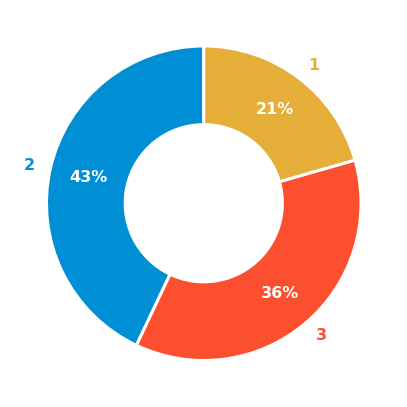

In [107]:
pie_data = data['interest_rate'].value_counts(normalize=True).values * 100
pie_label = data['interest_rate'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, _ = ax.pie(pie_data, startangle=90, labels=pie_label,
                          autopct='%0.f%%', pctdistance=0.75,
                          wedgeprops={'width':0.5, 'linewidth':3},
                          textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.tight_layout()

plt.show()

## Column List

In [108]:
column_numerical = data.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()

## Categorical Features

### Categorical Distribution

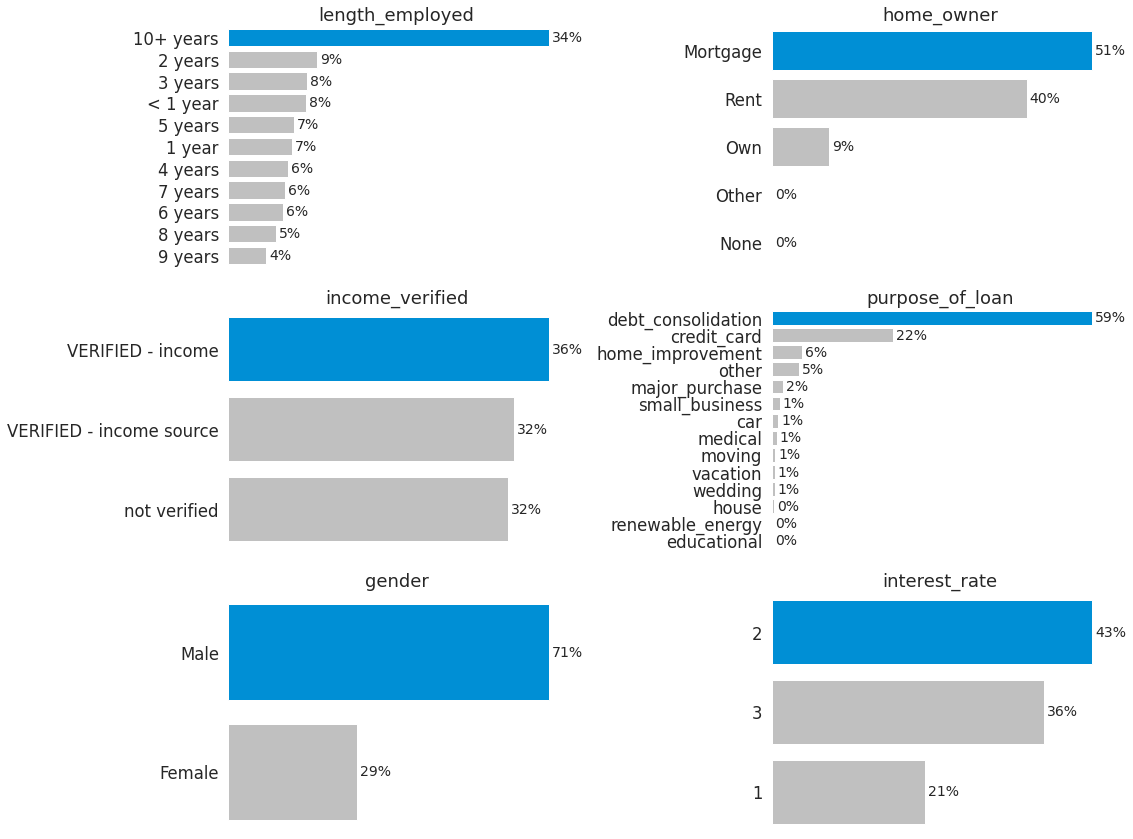

In [109]:
_, ax = plt.subplots(3,2,figsize=(16,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_categorical):
  tmp = data[col].value_counts(normalize=True) * 100
  
  rank_bar_plot(data=tmp, x=tmp.values, y=tmp.index.astype(str), ax=axes_list[i], 
                show=False, threshold_top=1, show_bot=False, fmt='%0.f%%', title=col)

# axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

### Feature Cardinality

In [110]:
data[column_categorical].apply(lambda x: x.unique())

length_employed    [< 1 year, 4 years, 7 years, 8 years, 2 years,...
home_owner                   [Rent, Mortgage, nan, Own, Other, None]
income_verified    [not verified, VERIFIED - income, VERIFIED - i...
purpose_of_loan    [car, debt_consolidation, credit_card, home_im...
gender                                                [Female, Male]
interest_rate                                              [1, 3, 2]
dtype: object

In [111]:
data[column_categorical].nunique()

length_employed    11
home_owner          5
income_verified     3
purpose_of_loan    14
gender              2
interest_rate       3
dtype: int64

## Numerical Distribution

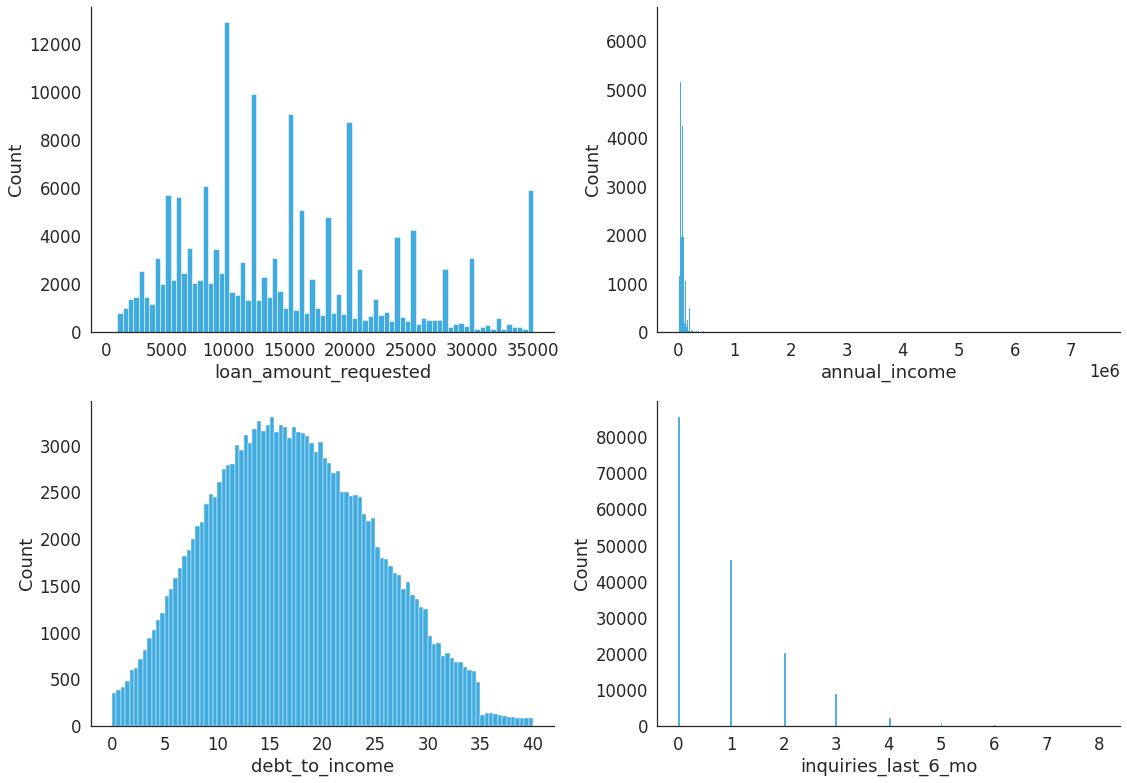

In [112]:
_, ax = plt.subplots(3,2,figsize=(16,16))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_numerical):
  sns.histplot(data=data, x=col, ax=axes_list[i])

axes_list[-2].set_visible(False)
axes_list[-1].set_visible(False)
sns.despine()

plt.tight_layout()
plt.show()

There are some features that skewed.

## Feature Associations

I will calculate the associations between each features to the target variable. Then, I will drop some features that have very small associations to the target variable.
<br><br>
I will mark the independent features that are highly correlated to each other, or we can say it as multicollinearity.

In [113]:
column_categorical

['length_employed',
 'home_owner',
 'income_verified',
 'purpose_of_loan',
 'gender',
 'interest_rate']

In [114]:
# update column list
column_numerical = data.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()

# calculate the associations (correlation) between features
associations_out = associations(data,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)

# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['interest_rate'].drop('interest_rate').sort_values(ascending=False)

### Association Heatmap

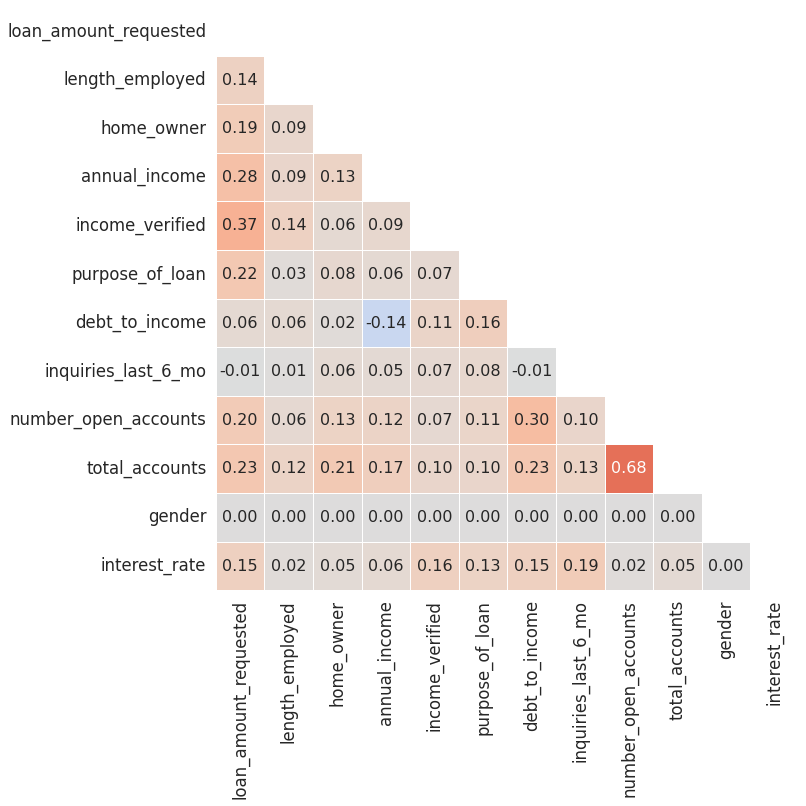

In [115]:
_, ax = plt.subplots(figsize=(10,10))

heatmap_corr_plot(corr_all, ax=ax, mask=True, annot=True)

### Associations to Target

Associations can be used to describe the relationship between features.

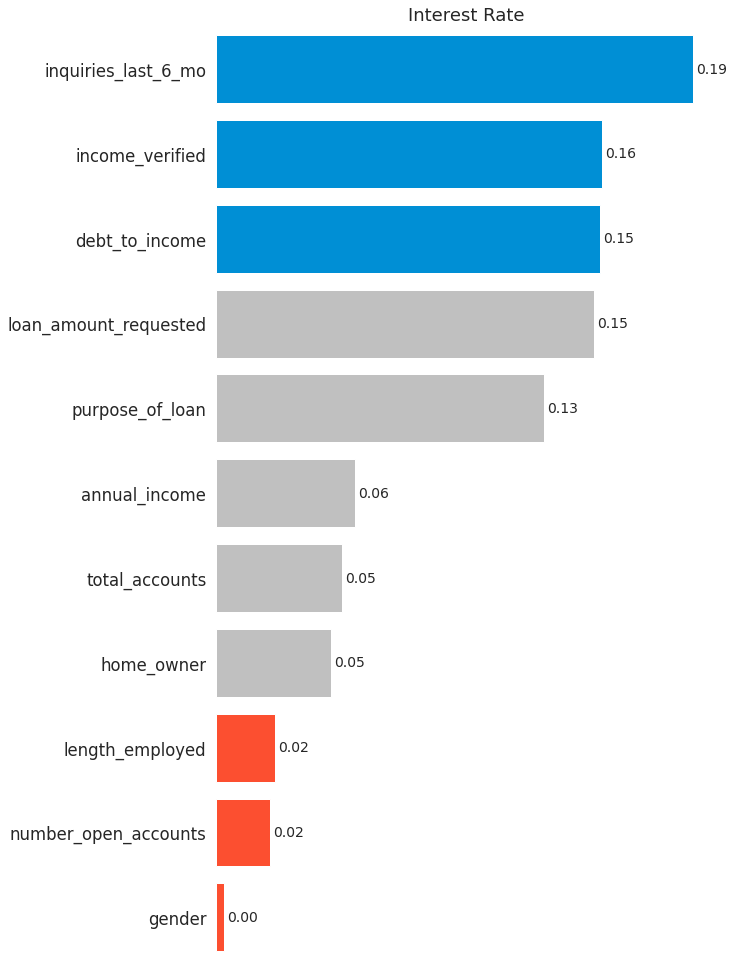

In [116]:
_, ax = plt.subplots(figsize=(8,16))

rank_bar_plot(data=corr_target, x=corr_target.values, y=corr_target.index, 
              ax=ax, threshold_top=3)

## Train - Test Split

I use a 70% : 30% ratio for the training set and testing set respectively.

In [117]:
data_X = data.drop(columns=['interest_rate'])
data_y = data['interest_rate']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3,
                                                    random_state=1, stratify=data_y)

I do train-test split first to prevent data leakage when doing the data preprocessing steps

In [118]:
column_numerical = data_X.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data_X.select_dtypes(exclude=np.number).columns.values.tolist()

## Skewness & Kurtosis

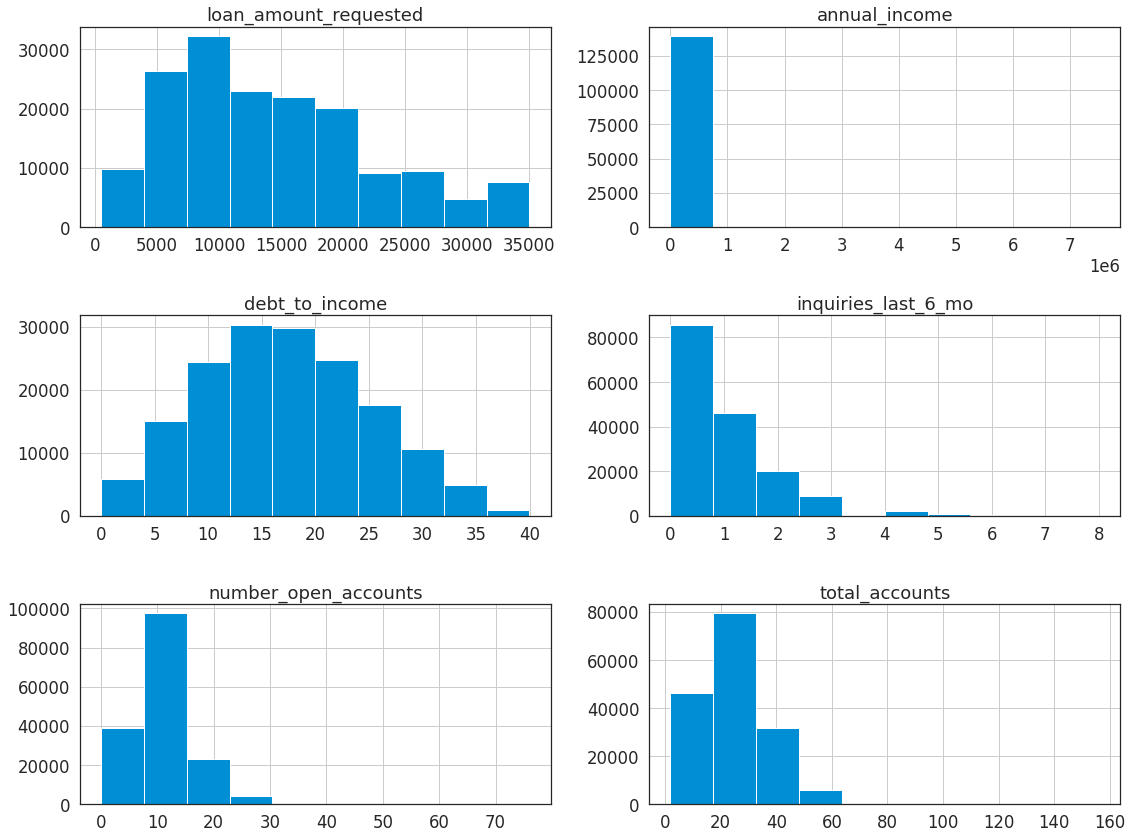

In [119]:
data[column_numerical].hist(figsize=(16,12))

plt.tight_layout()
plt.show()

At glance, we can see that there are some features that skewed.

### Interpreting Skewness

The rule of thumb for interpreting the skewness values:
- If skewness is less than −1 or greater than +1, the distribution can be called highly skewed.
- If skewness is between −1 and −½ or between +½ and +1, the distribution can be called moderately skewed.
- If skewness is between −½ and +½, the distribution can be called approximately symmetric.
<br>

[Source](https://brownmath.com/stat/shape.htm#SkewnessInterpret)

In [120]:
skewness = data[column_numerical].skew().sort_values(ascending=False)
skewness = pd.DataFrame(skewness).rename(columns={0:'skewness'})
skewness.style.background_gradient()

,skewness
annual_income,40.225
inquiries_last_6_mo,1.551
number_open_accounts,1.164
total_accounts,0.817
loan_amount_requested,0.727
debt_to_income,0.192


`annual_income` has the highest skewness

### Interpreting Kurtosis

- A normal distribution has kurtosis exactly 3 (excess kurtosis exactly 0). Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic.
- A distribution with kurtosis \<3 (excess kurtosis \<0) is called platykurtic. Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.
- A distribution with kurtosis \>3 (excess kurtosis \>0) is called leptokurtic. Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.
<br>

[Source](https://brownmath.com/stat/shape.htm#Kurtosis)

In [121]:
kurtosis = data[column_numerical].kurtosis().sort_values(ascending=False)
kurtosis = pd.DataFrame(kurtosis).rename(columns={0:'kurtosis'})
kurtosis.style.background_gradient()

,kurtosis
annual_income,3982.297
number_open_accounts,2.760
inquiries_last_6_mo,2.735
total_accounts,0.924
loan_amount_requested,-0.141
debt_to_income,-0.535


`annual_income` has the highest kurtosis

### Handling Skewness

I will use power transformation for numerical features except the `annual_income` feature. I will use log transform for it.

In [122]:
column_numerical_tmp = [col for col in column_numerical if col != 'annual_income']

for col in column_numerical_tmp:
  pt = PowerTransformer(method='yeo-johnson')
  pt.fit(X_train[[col]])

  X_train[col] = pt.transform(X_train[[col]])
  X_test[col] = pt.transform(X_test[[col]])

X_train['annual_income'] = np.log(X_train['annual_income'])
X_test['annual_income'] = np.log(X_test['annual_income'])

In [123]:
skewness_train = X_train[column_numerical].skew().sort_values(ascending=False)
skewness_train = pd.DataFrame(skewness_train).rename(columns={0:'skewness_train'})
skewness_train.style.background_gradient()

,skewness_train
inquiries_last_6_mo,0.278
annual_income,0.209
number_open_accounts,0.002
total_accounts,-0.010
loan_amount_requested,-0.043
debt_to_income,-0.075


In [124]:
skewness_test = X_train[column_numerical].skew().sort_values(ascending=False)
skewness_test = pd.DataFrame(skewness_test).rename(columns={0:'skewness_test'})
skewness_test.style.background_gradient()

,skewness_test
inquiries_last_6_mo,0.278
annual_income,0.209
number_open_accounts,0.002
total_accounts,-0.010
loan_amount_requested,-0.043
debt_to_income,-0.075


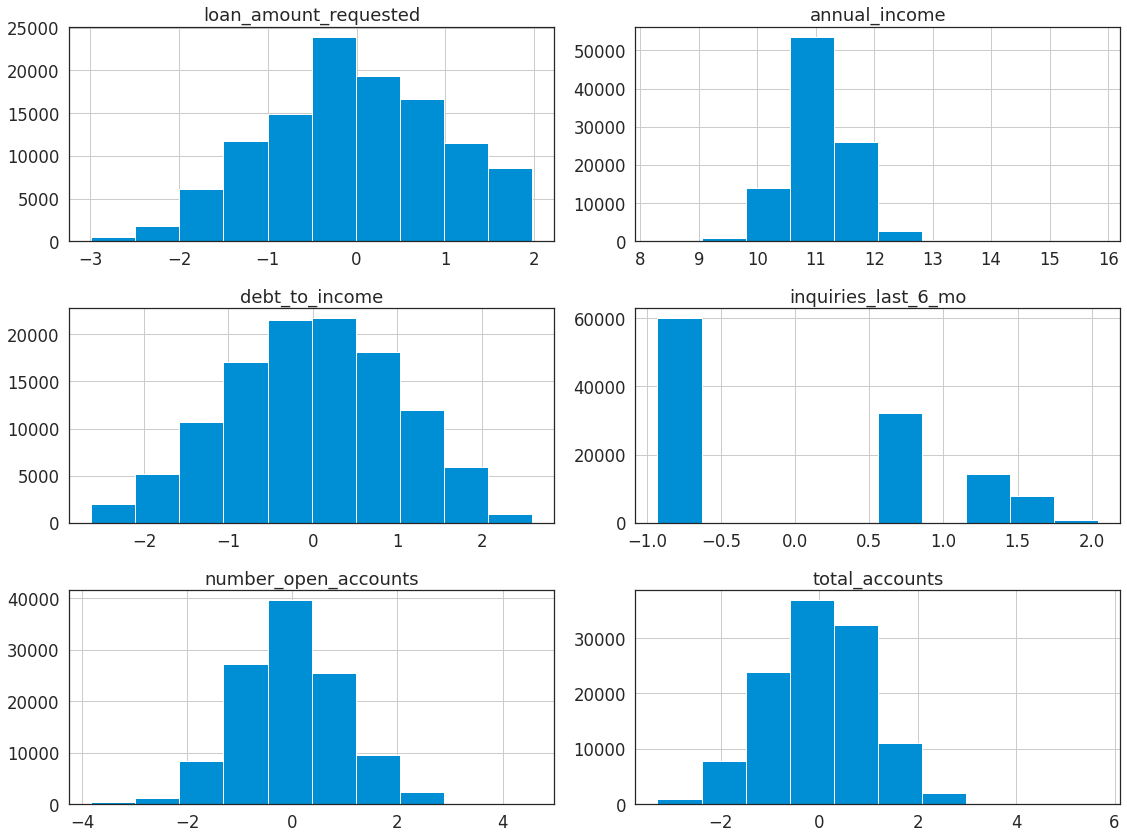

In [125]:
X_train[column_numerical].hist(figsize=(16,12))

plt.tight_layout()
plt.show()

## Missing Values Imputation

For now, I will just use a simple imputation (univariate feature imputation) strategy:
- Mean or median for numerical features
- Mode (most frequent) for categorical features

In [126]:
for col in X_train.columns:
  if col in column_categorical:
    imputer = SimpleImputer(strategy='most_frequent')
    imputer.fit(X_train[[col]])

    X_train[col] = imputer.transform(X_train[[col]])
    X_test[col] = imputer.transform(X_test[[col]])
  else:
    imputer = SimpleImputer(strategy='median')
    imputer.fit(X_train[[col]])

    X_train[col] = imputer.transform(X_train[[col]])
    X_test[col] = imputer.transform(X_test[[col]])

## Label Encoding

In [127]:
le = LabelEncoder()

le.fit(y_train)

y_train_encode = le.transform(y_train)
y_test_encode = le.transform(y_test)

In [128]:
le.classes_

array([1, 2, 3], dtype=object)

In [129]:
print(y_train[-5:].values)
print(y_train_encode[-5:])

[2 2 3 1 2]
[1 1 2 0 1]


## One Hot Encoding

In [130]:
# drop 1 category if the feature only has 2 categories
ohe = OneHotEncoder(sparse=False, drop='if_binary')

ohe.fit(X_train[column_categorical])

X_train_ohe = ohe.transform(X_train[column_categorical])
X_test_ohe = ohe.transform(X_test[column_categorical])

## Encoded Dataframe

I will combine the encoded features and the numerical features. Make sure that the index is the same.

In [131]:
column_ohe = ohe.get_feature_names_out()
column_ohe

array(['length_employed_1 year', 'length_employed_10+ years',
       'length_employed_2 years', 'length_employed_3 years',
       'length_employed_4 years', 'length_employed_5 years',
       'length_employed_6 years', 'length_employed_7 years',
       'length_employed_8 years', 'length_employed_9 years',
       'length_employed_< 1 year', 'home_owner_Mortgage',
       'home_owner_None', 'home_owner_Other', 'home_owner_Own',
       'home_owner_Rent', 'income_verified_VERIFIED - income',
       'income_verified_VERIFIED - income source',
       'income_verified_not verified', 'purpose_of_loan_car',
       'purpose_of_loan_credit_card',
       'purpose_of_loan_debt_consolidation',
       'purpose_of_loan_educational', 'purpose_of_loan_home_improvement',
       'purpose_of_loan_house', 'purpose_of_loan_major_purchase',
       'purpose_of_loan_medical', 'purpose_of_loan_moving',
       'purpose_of_loan_other', 'purpose_of_loan_renewable_energy',
       'purpose_of_loan_small_business', 'pur

I will rename the column name to `snake_case` format.

In [132]:
for i, col in enumerate(column_ohe):
  column_ohe[i] = inflection.underscore(column_ohe[i])
  column_ohe[i] = column_ohe[i].replace(' ', '_')
  column_ohe[i] = column_ohe[i].replace('<', 'less_than')
  column_ohe[i] = column_ohe[i].replace('>', 'greater_than')

column_ohe

array(['length_employed_1_year', 'length_employed_10+_years',
       'length_employed_2_years', 'length_employed_3_years',
       'length_employed_4_years', 'length_employed_5_years',
       'length_employed_6_years', 'length_employed_7_years',
       'length_employed_8_years', 'length_employed_9_years',
       'length_employed_less_than_1_year', 'home_owner_mortgage',
       'home_owner_none', 'home_owner_other', 'home_owner_own',
       'home_owner_rent', 'income_verified_verified___income',
       'income_verified_verified___income_source',
       'income_verified_not_verified', 'purpose_of_loan_car',
       'purpose_of_loan_credit_card',
       'purpose_of_loan_debt_consolidation',
       'purpose_of_loan_educational', 'purpose_of_loan_home_improvement',
       'purpose_of_loan_house', 'purpose_of_loan_major_purchase',
       'purpose_of_loan_medical', 'purpose_of_loan_moving',
       'purpose_of_loan_other', 'purpose_of_loan_renewable_energy',
       'purpose_of_loan_small_busines

### Train Set

In [133]:
# create dataframe from one-hot encoded features
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=column_ohe, index=X_train.index)

# combine the numerical and encoded features
X_train_encode = pd.concat([X_train.drop(columns=column_categorical), X_train_ohe_df], axis=1)
X_train_encode.head()

,loan_amount_requested,annual_income,debt_to_income,inquiries_last_6_mo,number_open_accounts,total_accounts,length_employed_1_year,length_employed_10+_years,length_employed_2_years,length_employed_3_years,length_employed_4_years,length_employed_5_years,length_employed_6_years,length_employed_7_years,length_employed_8_years,length_employed_9_years,length_employed_less_than_1_year,home_owner_mortgage,home_owner_none,home_owner_other,home_owner_own,home_owner_rent,income_verified_verified___income,income_verified_verified___income_source,income_verified_not_verified,purpose_of_loan_car,purpose_of_loan_credit_card,purpose_of_loan_debt_consolidation,purpose_of_loan_educational,purpose_of_loan_home_improvement,purpose_of_loan_house,purpose_of_loan_major_purchase,purpose_of_loan_medical,purpose_of_loan_moving,purpose_of_loan_other,purpose_of_loan_renewable_energy,purpose_of_loan_small_business,purpose_of_loan_vacation,purpose_of_loan_wedding,gender_male
89886,-0.374,11.043,1.377,-0.929,-0.849,-0.859,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
90538,0.262,10.657,0.668,-0.929,0.334,0.142,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32854,-1.086,10.309,1.275,0.724,0.134,-1.107,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
116057,-1.061,12.848,-1.048,0.724,0.522,0.841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61991,0.262,10.800,-0.045,0.724,-0.569,-0.980,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Test Set

In [134]:
# create dataframe from one-hot encoded features
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=column_ohe, index=X_test.index)

# combine the numerical and encoded features
X_test_encode = pd.concat([X_test.drop(columns=column_categorical), X_test_ohe_df], axis=1)
X_test_encode.head()

,loan_amount_requested,annual_income,debt_to_income,inquiries_last_6_mo,number_open_accounts,total_accounts,length_employed_1_year,length_employed_10+_years,length_employed_2_years,length_employed_3_years,length_employed_4_years,length_employed_5_years,length_employed_6_years,length_employed_7_years,length_employed_8_years,length_employed_9_years,length_employed_less_than_1_year,home_owner_mortgage,home_owner_none,home_owner_other,home_owner_own,home_owner_rent,income_verified_verified___income,income_verified_verified___income_source,income_verified_not_verified,purpose_of_loan_car,purpose_of_loan_credit_card,purpose_of_loan_debt_consolidation,purpose_of_loan_educational,purpose_of_loan_home_improvement,purpose_of_loan_house,purpose_of_loan_major_purchase,purpose_of_loan_medical,purpose_of_loan_moving,purpose_of_loan_other,purpose_of_loan_renewable_energy,purpose_of_loan_small_business,purpose_of_loan_vacation,purpose_of_loan_wedding,gender_male
12829,-1.273,11.002,-0.644,0.724,0.134,0.841,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
66004,-1.273,11.067,0.928,-0.929,0.134,0.841,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
52565,0.725,11.813,-0.099,-0.929,0.134,0.227,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
153795,0.534,11.010,1.504,0.724,1.828,1.243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11403,-0.381,10.645,-1.267,-0.929,-1.161,-0.631,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Full Dataset

In [135]:
# combine the X-train and X-test
data_encode = pd.concat([X_train_encode, X_test_encode], axis=0)

# combine with the y-train
data_encode = data_encode.join(pd.Series(y_train_encode, name='interest_rate', index=X_train_encode.index), lsuffix='_1', rsuffix='_2')

# combine with the y-test
data_encode = data_encode.join(pd.Series(y_test_encode, name='interest_rate', index=X_test_encode.index), lsuffix='_1', rsuffix='_2')

# merging the y-train and y-test column
data_encode['interest_rate_1'].fillna(data_encode['interest_rate_2'], inplace=True)
data_encode.drop(columns='interest_rate_2', inplace=True)
data_encode.rename(columns={'interest_rate_1':'interest_rate'}, inplace=True)

data_encode.head()

,loan_amount_requested,annual_income,debt_to_income,inquiries_last_6_mo,number_open_accounts,total_accounts,length_employed_1_year,length_employed_10+_years,length_employed_2_years,length_employed_3_years,length_employed_4_years,length_employed_5_years,length_employed_6_years,length_employed_7_years,length_employed_8_years,length_employed_9_years,length_employed_less_than_1_year,home_owner_mortgage,home_owner_none,home_owner_other,home_owner_own,home_owner_rent,income_verified_verified___income,income_verified_verified___income_source,income_verified_not_verified,purpose_of_loan_car,purpose_of_loan_credit_card,purpose_of_loan_debt_consolidation,purpose_of_loan_educational,purpose_of_loan_home_improvement,purpose_of_loan_house,purpose_of_loan_major_purchase,purpose_of_loan_medical,purpose_of_loan_moving,purpose_of_loan_other,purpose_of_loan_renewable_energy,purpose_of_loan_small_business,purpose_of_loan_vacation,purpose_of_loan_wedding,gender_male,interest_rate
89886,-0.374,11.043,1.377,-0.929,-0.849,-0.859,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
90538,0.262,10.657,0.668,-0.929,0.334,0.142,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
32854,-1.086,10.309,1.275,0.724,0.134,-1.107,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
116057,-1.061,12.848,-1.048,0.724,0.522,0.841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
61991,0.262,10.800,-0.045,0.724,-0.569,-0.980,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


I will create another dataframe from the train set (X & y) for later use.

In [136]:
data_encode_train = pd.concat([X_train_encode, 
                               pd.Series(y_train_encode, name='interest_rate', index=X_train_encode.index)], 
                              axis=1)
data_encode_train.head()

,loan_amount_requested,annual_income,debt_to_income,inquiries_last_6_mo,number_open_accounts,total_accounts,length_employed_1_year,length_employed_10+_years,length_employed_2_years,length_employed_3_years,length_employed_4_years,length_employed_5_years,length_employed_6_years,length_employed_7_years,length_employed_8_years,length_employed_9_years,length_employed_less_than_1_year,home_owner_mortgage,home_owner_none,home_owner_other,home_owner_own,home_owner_rent,income_verified_verified___income,income_verified_verified___income_source,income_verified_not_verified,purpose_of_loan_car,purpose_of_loan_credit_card,purpose_of_loan_debt_consolidation,purpose_of_loan_educational,purpose_of_loan_home_improvement,purpose_of_loan_house,purpose_of_loan_major_purchase,purpose_of_loan_medical,purpose_of_loan_moving,purpose_of_loan_other,purpose_of_loan_renewable_energy,purpose_of_loan_small_business,purpose_of_loan_vacation,purpose_of_loan_wedding,gender_male,interest_rate
89886,-0.374,11.043,1.377,-0.929,-0.849,-0.859,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
90538,0.262,10.657,0.668,-0.929,0.334,0.142,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
32854,-1.086,10.309,1.275,0.724,0.134,-1.107,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
116057,-1.061,12.848,-1.048,0.724,0.522,0.841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
61991,0.262,10.800,-0.045,0.724,-0.569,-0.980,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2


## Correlation

In [137]:
corr_matrix = data_encode.corr()

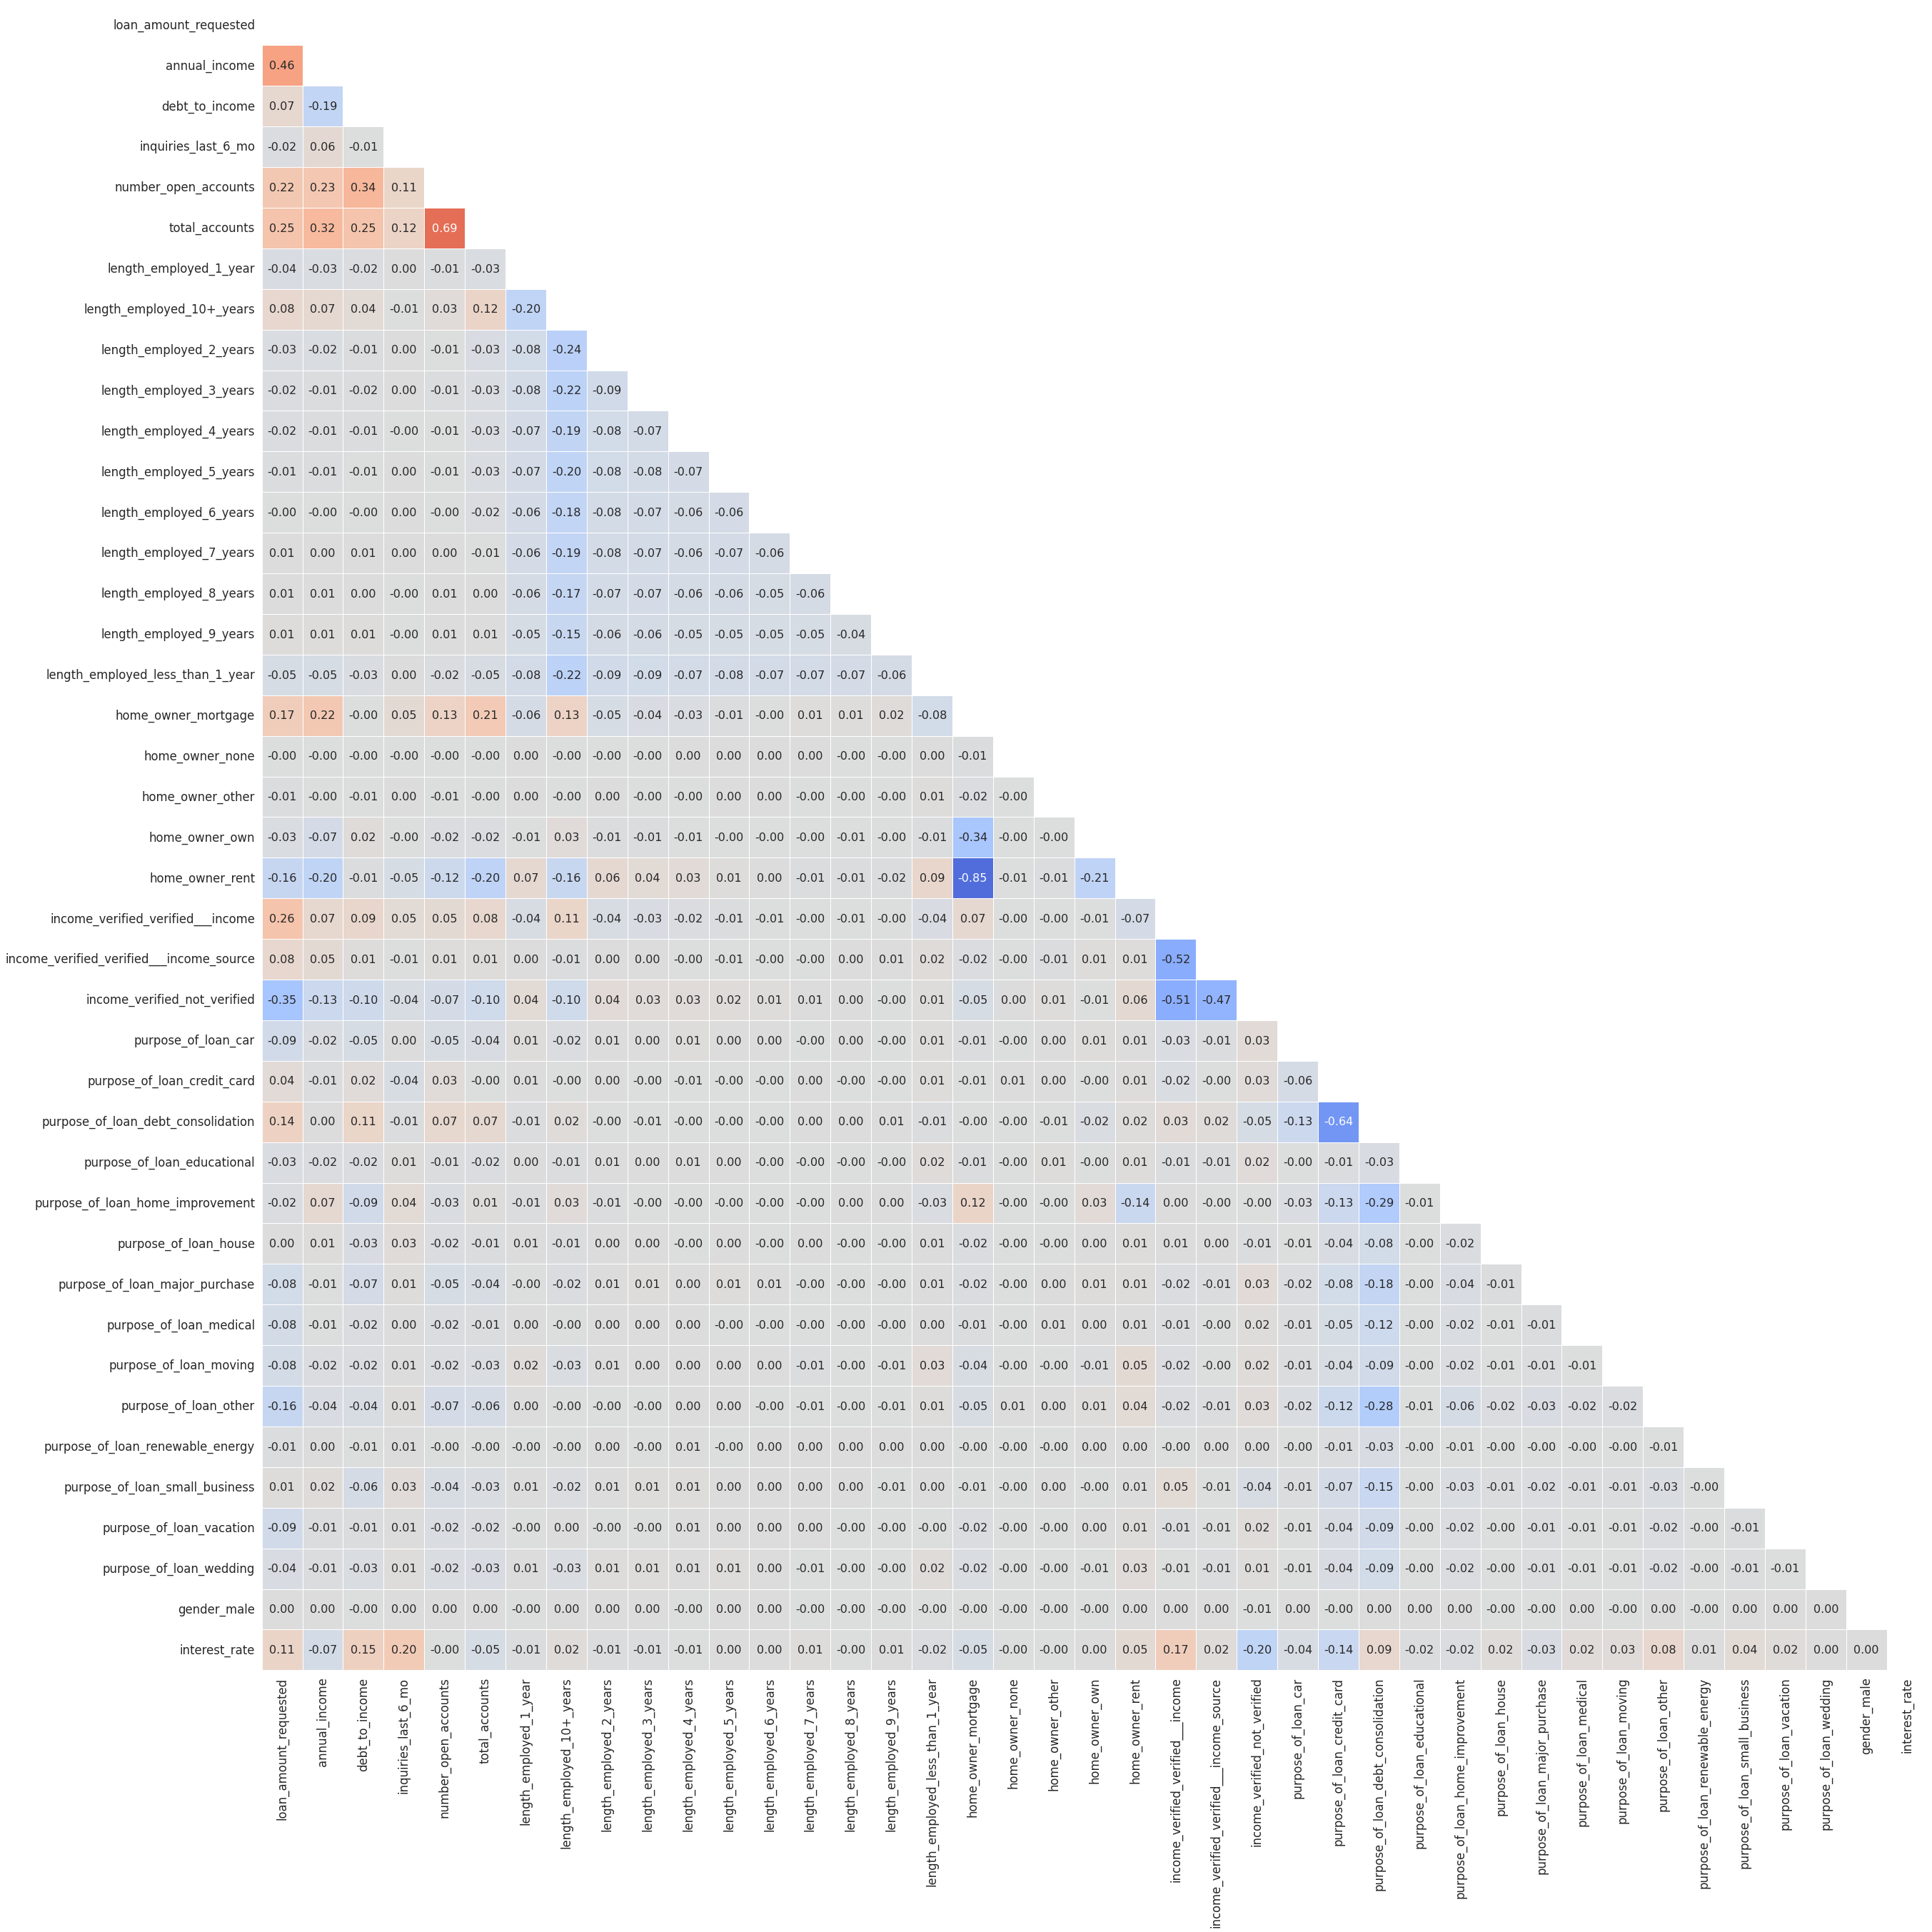

In [138]:
_, ax = plt.subplots(figsize=(40,40))

heatmap_corr_plot(corr_matrix, mask=True, annot=True, ax=ax)

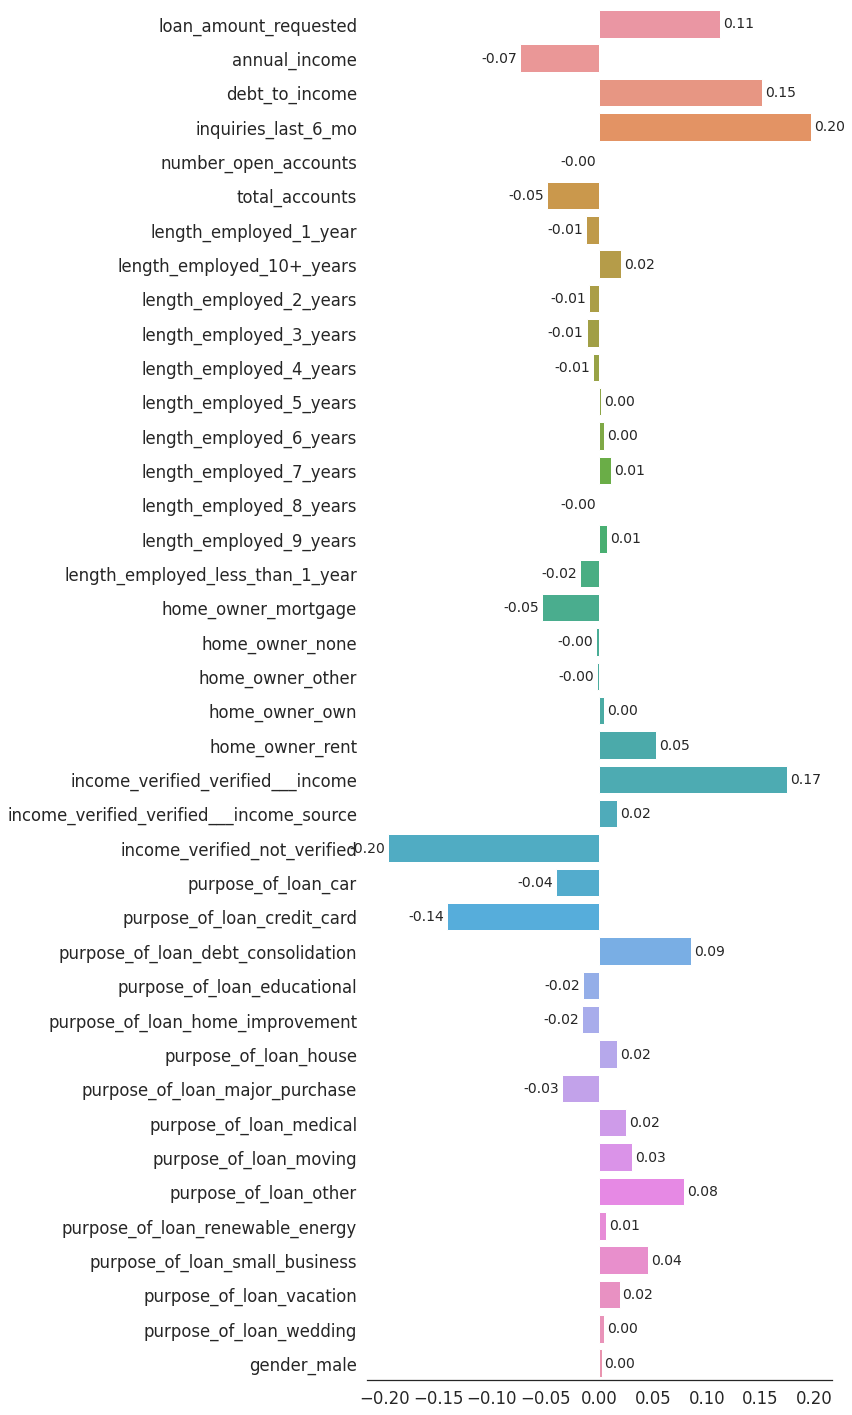

In [139]:
corr_target = corr_matrix['interest_rate'].drop('interest_rate')

fig, ax = plt.subplots(figsize=(12,20))

sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

sns.despine(left=True)
plt.tight_layout()

plt.show()

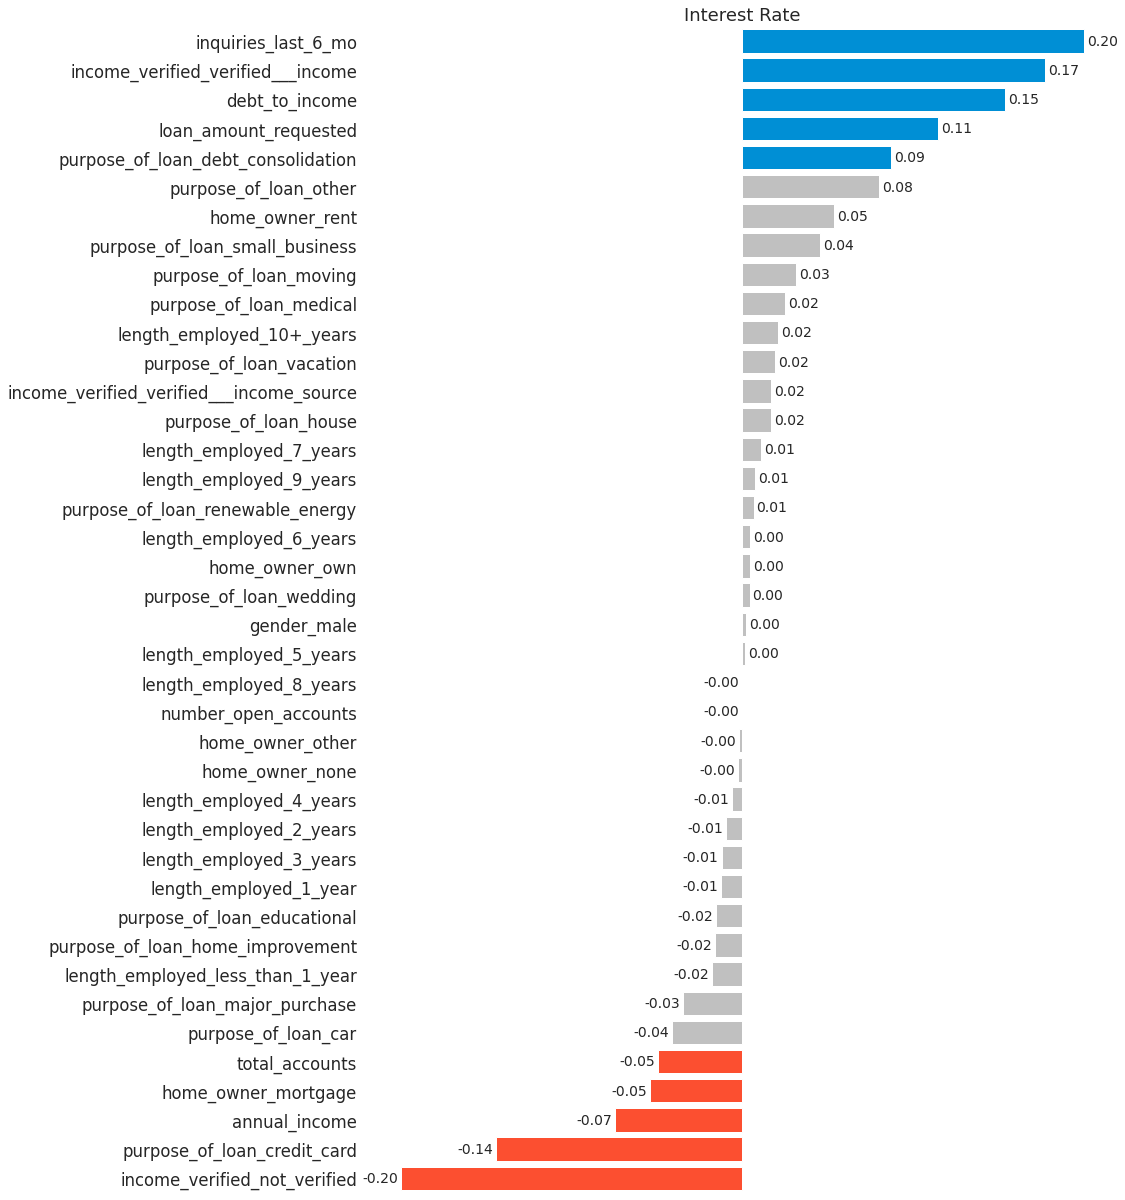

In [140]:
corr_target = corr_matrix['interest_rate'].drop('interest_rate').sort_values(ascending=False)

_, ax = plt.subplots(figsize=(12,20))

rank_bar_plot(data=corr_target, x=corr_target.values, y=corr_target.index, ax=ax)

## Oversampling with SMOTE

This dataset is imbalanced. So, my approach to get it balanced is to use SMOTE, one of the oversampling methods.
<br><br>
Note: Oversampling should only be performed on the train set.

In [141]:
smote = SMOTE(random_state=1)

X_train_smote, y_train_smote = smote.fit_resample(X_train_encode, y_train_encode)

X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train_smote.columns)
y_train_smote_df = pd.DataFrame(y_train_smote, columns=['interest_rate'])

data_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

In [142]:
data_encode_train['interest_rate'].value_counts()

1    49406
2    41946
0    23664
Name: interest_rate, dtype: int64

In [143]:
data_smote['interest_rate'].value_counts()

1    49406
2    49406
0    49406
Name: interest_rate, dtype: int64

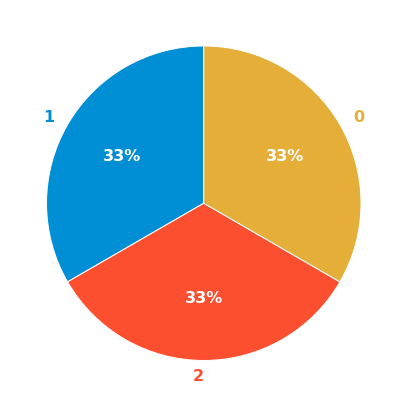

In [144]:
pie_data = data_smote['interest_rate'].value_counts(normalize=True).values * 100
pie_label = data_smote['interest_rate'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90,
                                  autopct='%.0f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.tight_layout()

plt.show()

Now, all the target variable have the same number.

# Model Development (Without Feature Selection)

My computer resource is limited, so I use Google Colab to make this project. However, when I use Google Colab I always run out of resources too (crashing and restarting its runtime). Therefore, I will limit my project to using only 3 ML algorithms: Catboost, XGBoost, and LightGBM.

## Default Parameter

### Parameter List

For now, I will use the default parameter

In [145]:
model_list = {
    'CatBoost':CatBoostClassifier(random_state=1, verbose=False),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}

X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_encode.copy()
y_test_model = y_test_encode.copy()

### CatBoost

In [146]:
# model_list['CatBoost'].fit(X_train_model, y_train_model)
# y_pred = model_list['CatBoost'].predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
              precision    recall  f1-score   support

           0      0.444     0.294     0.354     10142
           1      0.502     0.579     0.538     21174
           2      0.583     0.588     0.586     17977

    accuracy                          0.524     49293
   macro avg      0.510     0.487     0.493     49293
weighted avg      0.520     0.524     0.517     49293

```



### XGBoost

In [147]:
# model_list['XGBoost'].fit(X_train_model, y_train_model)
# y_pred = model_list['XGBoost'].predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
              precision    recall  f1-score   support

           0      0.366     0.490     0.419     10142
           1      0.510     0.398     0.447     21174
           2      0.564     0.602     0.582     17977

    accuracy                          0.491     49293
   macro avg      0.480     0.496     0.483     49293
weighted avg      0.500     0.491     0.490     49293

```



### LightGBM

In [148]:
# model_list['LightGBM'].fit(X_train_model, y_train_model)
# y_pred = model_list['LightGBM'].predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))



```
              precision    recall  f1-score   support

           0      0.417     0.332     0.369     10142
           1      0.504     0.546     0.524     21174
           2      0.582     0.592     0.587     17977

    accuracy                          0.519     49293
   macro avg      0.501     0.490     0.494     49293
weighted avg      0.515     0.519     0.515     49293

```



## Hyperparameter Tuning

I will use Optuna for hyperparameter tuning. However, I will only tune for the XGBoost and LightGBM. Again, that's because the limited resources, like this:


```
CatBoost is using more CPU RAM (10.5GiB) than the limit (3GiB)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(139888) > ResourceQuota(0)
```

### LightGBM

In [149]:
# def objective(trial):
#   dtrain = lgbm.Dataset(X_train_model, label=y_train_model)

#   param = {
#     "objective": "binary",
#     "metric": "binary_logloss",
#     "verbosity": -1,
#     "boosting_type": "gbdt",
#     "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
#     "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
#     "num_leaves": trial.suggest_int("num_leaves", 2, 256),
#     "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
#     "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
#     "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
#     "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
#   }

#   # model = LGBMClassifier(random_state=1, **param)
#   # model.fit(X_train_model, y_train_model)
#   # preds = model.predict(X_test_model)
#   # pred_labels = np.rint(preds)

#   gbm = lgbm.train(param, dtrain)
#   preds = gbm.predict(X_test_model)
#   pred_labels = np.rint(preds)

#   # objective value (optimize this value)
#   objective_value = accuracy_score(y_test_model, pred_labels)
#   # objective_value = f1_score(y_test_model, pred_labels, pos_label=0)
#   return objective_value

In [150]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100, timeout=600)

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))
# print("  Params: ")
# for key, value in trial.params.items():
#   print("    {}: {}".format(key, value))

In [151]:
# model = LGBMClassifier(random_state=1)
# model.set_params(**trial.params)

In [152]:
# model.fit(X_train_model, y_train_model)

# y_pred = model.predict(X_test_model)

# print(classification_report(y_test_model, y_pred, digits=3))

In [153]:
model = LGBMClassifier(bagging_fraction=0.7706965912363938, bagging_freq=7,
               feature_fraction=0.7182824580742062,
               lambda_l1=5.070037029497335e-08, lambda_l2=0.16241212171384678,
               min_child_samples=60, num_leaves=149, random_state=1)

model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print(classification_report(y_test_model, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.433     0.281     0.341     10142
           1      0.504     0.583     0.541     21174
           2      0.583     0.590     0.587     17977

    accuracy                          0.524     49293
   macro avg      0.507     0.485     0.489     49293
weighted avg      0.518     0.524     0.516     49293



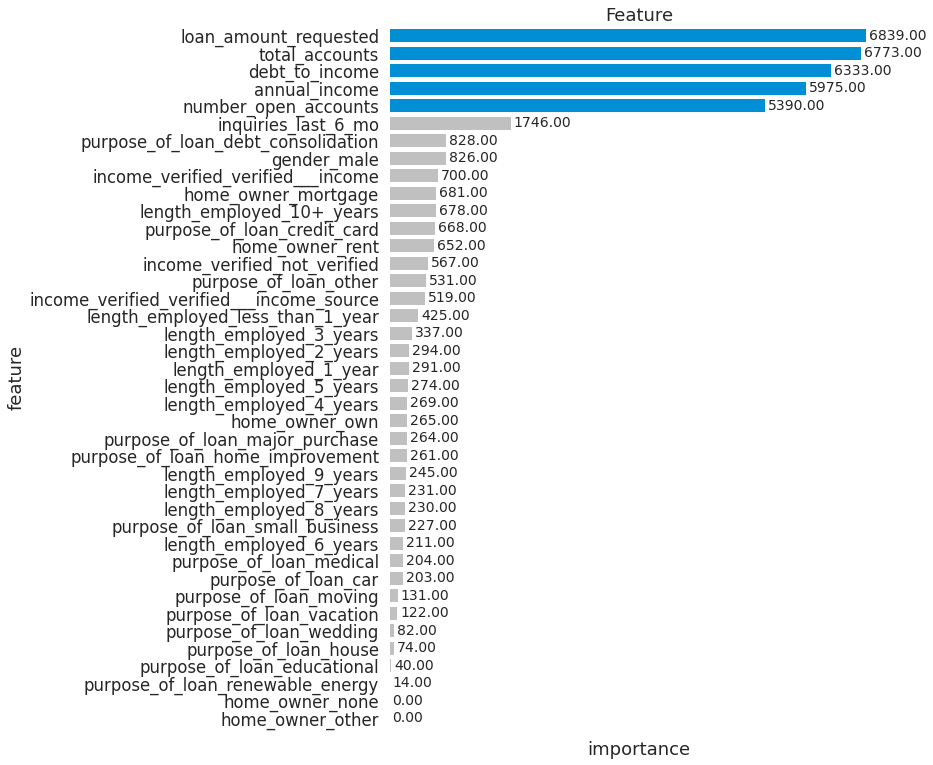

In [192]:
column_list = X_train_model.columns.tolist()
feature_importance = model.feature_importances_

list_zip = list(zip(column_list,feature_importance))
tmp = pd.DataFrame(data=list_zip,
                   columns=['feature','importance'])

tmp = tmp.sort_values(by='importance', ascending=False)

tmp.set_index('feature', inplace=True)
_, ax = plt.subplots(figsize=(8,12))

rank_bar_plot(data=tmp, x=tmp['importance'], y=tmp.index, ax=ax, show_bot=False)



```
Number of finished trials:  85
Best trial:
  Value: 0.4380337979023391
  Params: 
    lambda_l1: 5.070037029497335e-08
    lambda_l2: 0.16241212171384678
    num_leaves: 149
    feature_fraction: 0.7182824580742062
    bagging_fraction: 0.7706965912363938
    bagging_freq: 7
    min_child_samples: 60
```





```
LGBMClassifier(bagging_fraction=0.7706965912363938, bagging_freq=7,
               feature_fraction=0.7182824580742062,
               lambda_l1=5.070037029497335e-08, lambda_l2=0.16241212171384678,
               min_child_samples=60, num_leaves=149, random_state=1)
```





```
              precision    recall  f1-score   support

           0      0.433     0.281     0.341     10142
           1      0.504     0.583     0.541     21174
           2      0.583     0.590     0.587     17977

    accuracy                          0.524     49293
   macro avg      0.507     0.485     0.489     49293
weighted avg      0.518     0.524     0.516     49293

```

